# **Trabalho Prático 2 (IACD) - 2024/2025**
### "Projeto: Sistema de Intervenção Estudantil"
Trabalho realizado por: **Afonso Marcos** (202404088), **Afonso Silva** (202406661), **Pedro Afonso** (202404125)


# Introdução

A utilização de técnicas de _Machine Learning_ tem sido cada vez maior, ganhando bastante relevância como ferramenta de apoio em diversas áreas, podendo dar apoio, por exemplo, dentro do ramo da educação, na gestão pedagógica e na promoção do sucesso escolar. A capacidade de prever o desempenho dos estudantes, através de dados históricos e demográficos, permite não só antecipar dificuldades, mas também implementar medidas de intervenção mais eficazes.

Neste projeto, propõe-se a abordagem de um caso real desta ciência, incluindo a análise exploratória, limpeza e transformação dos dados, avaliação dos modelos de previsão, inspeção visual e comunicação dos resultados, com base no _dataset_ 'UCI Student Performance', que contém informações sobre alunos do ensino secundário em Portugal. Desta forma, foi construída uma pipeline de _Machine Learning_, capaz de prever se um aluno irá, ou não, reprovar no exame final, de acordo com características, como faltas, ambiente familiar, hábitos de estudo, entre outros.

---

# Bibliotecas importadas para a realização do trabalho

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import os 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
# Modelos de Classificação para a terceira tarefa
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

                                                #StratifiedKFold

Para o devido funcionamento e visualização deste projeto, é recomendado utilizar o Anaconda Python Distribution, pois permite acessar a várias biliotecas Python utilizadas neste sistema.  
  
As principais bibliotecas utilizadas são:
- **Numpy**: permite realizar uma grande variedade de operações matemáticas em arrays e matrizes.
- **Pandas**: facilita a análise, manipulação e estruturação eficientes dos dados.
- **Scikit-learn**: disponibiliza ferramentas simples e eficazes para a previsão de resultados com base em dados.
- **Matplotlib**: utilizado para criar gráficos e visualizar os dados de forma detalhada.
- **Seaborn**: fornece uma interface de alto nível, permitindo criar visualizações estatísticas complexas de forma simples, complementando o Matplotlib.


---

# Formulação do Problema

Este trabalho tem como objetivo principal desenvolver um sistema de intervenção estudantil, capaz de prever se um aluno irá ou não passar no exame final, com base no _dataset_ do 'UCI Student Performance' fornecido. Nesse sentido, foi feita incialmente uma análise exploratória dos dados do _dataset_ em questão e, de seguida, foram aplicados em modelos de _Supervised Learning_ para a classificação dos dados e respetiva avaliaçãode performance. Quanto aos dados fornecidos, podem ser divididos nas seguintes categorias:

- **Categóricos**:  
  **school**(`GP` ou `MS`),  
  **sex**(`F` ou `M`),  
  **adress**(`U` ou `R`),  
  **famsize**(`LE3` ou `GT3`);**Pstatus**(`T` ou `A`),  
  **Mjob**(`teacher`, `health`, `services`, `at_home` ou `other`),  
  **Fjob**(`teacher`, `health`, `services`, `at_home` ou `other`),  
  **reason**(`home`, `reputation`, `course` ou `other`),  
  **guardian**(`mother`, `father` ou `other`).  

- **Numéricos**:  
  **age**, **Medu**, **Fedu**, **traveltime**, **studytime**, **failures**,  
  **famrel**, **freetime**, **goout**, **Dalc**, **Walc**, **health**, **absences**.

- **Booleanos**:   
  **schoolsup**, **famsup**, **paid**, **activities**, **nursery**,  
  **higher**, **internet**, **romantic**, **passed**.


###### Os dados apresentados como 'Booleanos' são na verdade expressos como 'yes' ou 'no' invés de 'True' ou 'False'. Além disso, todas as categorias podem conter valores omissos que deverão ser tratados no pré-processamento.
###### Por fim, visto que estamos a realizar uma 'classificação', podemos comprovar o quão precisos foram os resultados de modo a avaliar a eficácia dos métodos usados.

Através da criação de um pipeline completo de Machine Learning, pretende-se automatizar a identificação das principais _features_ que podem causar a reprovação de um aluno, permitindo adotar medidas pedagógicas que mudem este panorama.

---
## Objetivo
O principal objetivo é criar um classificador binário que, mediante dados sobre o perfil do aluno, **preveja a variável _passed_**, que assume os valores:
- _'yes'_: o aluno passou no exame final;
- _'no'_: o aluno reprovou no exame final.

---
## Justificação
A possibilidade de antever o sucesso, ou não, de um aluno, tendo em conta um conjunto de dados anteriormente recolhido, pode ser bastante benéfica. Desta forma, esta prevsão permite que o plano de ensino, a disponibilização de recursos, o apoio individualizado e a redução do abandono escolar sejam diretamente impactadas, através desta análise prévia informada. Ainda, este sistema pode ser implementado em plataformas escolares que, ao detetar sinais de possível reprovação, emitem alertas prévios, permitindo apoiar decisões pedagócias mais eficazes e direcionadas.

---
## Dataset
O dataset usado é o UCI Machine Learning Repository, disponível em [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance).  
Contém dados de 395 estudantes, incluindo:
- Atributos pessoais (ex.: idade, género, situação romântica);
- Contexto familiar (ex.: educação dos pais, apoio familiar);
- Comportamento social e tempo de estudo;
- Presenças, consumo de álcool, e resultados académicos.

---

# Exploração dos dados

Esta etapa destina-se à análise dos dados do `dataset`. O seu principal objetivo passa por várias etapas: identificação de erros, da relevância dos dados recolhidos, sujeitos, inicialmente, a identificação e, posteriormente a retificações ou eliminações. Quantos às informações recolhidas

---
### Informação Geral e Tipo de Dados

Para o devido funcionamento, o ficheiro csv deve estar no mesmo diretório que este documento Jupyter.  
Após a criação do dataframe _'data'_, é possível analisar e retirar as informações do dataset (através do comando _data.info()_). Nessas informações, está incluído: número, nome e tipo(_int_,_object_, entre outras) das _features_; dimensões e espaço usado no dataframe.

In [2]:
# Leitura do ficheiro
data = pd.read_csv('student-data.csv')

### Observações Gerais

In [3]:
data.shape

(395, 31)

Com o comando "shape", é possível verificar que, no total, existem 395 alunos e 31 _features_ sobre cada um.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

1. Valores que aparecem nas features 
 Útil para perceber a cardinalidade  das features.

In [5]:
print("\n--- Número e tipos de Valores  por Coluna ---")
for col in data.columns:
        num_unique = data[col].nunique()
        unique_values = data[col].unique()
        try:
            # para melhor legibilidade
            sorted_unique_values = np.sort(unique_values)
            # Formata os valores como string separados por vírgula
            values_str = ', '.join(map(str, sorted_unique_values))
        except TypeError: # Se não der para ordenar (tipos mistos)
            values_str = ', '.join(map(str, unique_values))
        print(f"{col}: {num_unique} ({values_str})")


--- Número e tipos de Valores  por Coluna ---
school: 2 (GP, MS)
sex: 2 (F, M)
age: 8 (15, 16, 17, 18, 19, 20, 21, 22)
address: 2 (R, U)
famsize: 2 (GT3, LE3)
Pstatus: 2 (A, T)
Medu: 5 (0, 1, 2, 3, 4)
Fedu: 5 (0, 1, 2, 3, 4)
Mjob: 5 (at_home, health, other, services, teacher)
Fjob: 5 (at_home, health, other, services, teacher)
reason: 4 (course, home, other, reputation)
guardian: 3 (father, mother, other)
traveltime: 4 (1, 2, 3, 4)
studytime: 4 (1, 2, 3, 4)
failures: 4 (0, 1, 2, 3)
schoolsup: 2 (no, yes)
famsup: 2 (no, yes)
paid: 2 (no, yes)
activities: 2 (no, yes)
nursery: 2 (no, yes)
higher: 2 (no, yes)
internet: 2 (no, yes)
romantic: 2 (no, yes)
famrel: 5 (1, 2, 3, 4, 5)
freetime: 5 (1, 2, 3, 4, 5)
goout: 5 (1, 2, 3, 4, 5)
Dalc: 5 (1, 2, 3, 4, 5)
Walc: 5 (1, 2, 3, 4, 5)
health: 5 (1, 2, 3, 4, 5)
absences: 34 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 38, 40, 54, 56, 75)
passed: 2 (no, yes)


2. Primeira visualização dos dados
    Contacto com as dez primeiras e ultimas 5 linhas do dataframe com objetivo de perceber como os dados estão organizados e estruturados.

In [6]:
print("--- Primeiras 10 linhas dos dados ---")
print(data.head(10))
print("\n--- Últimas 5 linhas dos dados ---")
print(data.tail(5))

--- Primeiras 10 linhas dos dados ---
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...       no       no       4   

3. Contagem Explícita de Valores Ausentes
Cálculo e exibição do número exato de valores ausentes (NaN/nulos) em cada coluna

In [7]:
print("\n--- Contagem de Valores Ausentes por Coluna ---")
missing_values = data.isnull().sum()
print(missing_values)
print(f"\n--- Total de Valores Ausentes no Dataset: {missing_values.sum()} ---")
# Se houver muitos valores ausentes (>0), investigar mais a fundo depois.


--- Contagem de Valores Ausentes por Coluna ---
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

--- Total de Valores Ausentes no Dataset: 0 ---


4. Estatísticas Descritivas (Variáveis Numéricas)
eração de estatísticas descritivas (média, desvio padrão, mínimo, máximo, quartis) para todas as colunas numéricas (inteiros e floats) 

In [8]:

# Para colunas numéricas (int, float)
print("\n--- Estatísticas Descritivas (Colunas Numéricas)  ---")
print(data.describe())


--- Estatísticas Descritivas (Colunas Numéricas)  ---
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013

5. Estatísticas Descritivas (Variáveis Categóricas)
eração de estatísticas descritivas para colunas do tipo 'object' (geralmente strings/categóricas) usando `data.describe(include='object')

In [9]:
print("\n--- Estatísticas Descritivas (Colunas Categóricas/Object) ---")
# O include='object' retorna strings. 
print(data.describe(include='object'))


--- Estatísticas Descritivas (Colunas Categóricas/Object) ---
       school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     395     395     395    395    395     395      395   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     307     281     354    141    217     145      273   

       schoolsup famsup paid activities nursery higher internet romantic  \
count        395    395  395        395     395    395      395      395   
unique         2      2    2          2       2      2        2        2   
top           no    yes   no        yes     yes    yes      yes       no   
freq         344    242  214        201     314    375      329      263   

       passed  
count     395  
unique      2  
top       yes  
freq      265  


 7. Análise Inicial da Variável Alvo( 'passed' )

In [10]:

print("\n--- Distribuição da Variável Alvo ('passed') ---")
print(data['passed'].value_counts())
print("\n--- Distribuição Percentual da Variável Alvo ('passed') ---")
print(data['passed'].value_counts(normalize=True) * 100)


--- Distribuição da Variável Alvo ('passed') ---
passed
yes    265
no     130
Name: count, dtype: int64

--- Distribuição Percentual da Variável Alvo ('passed') ---
passed
yes    67.088608
no     32.911392
Name: proportion, dtype: float64


8. Box plot para as faltas 'absences'

/tmp/ipykernel_151481/482835831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['absences'], palette='viridis')


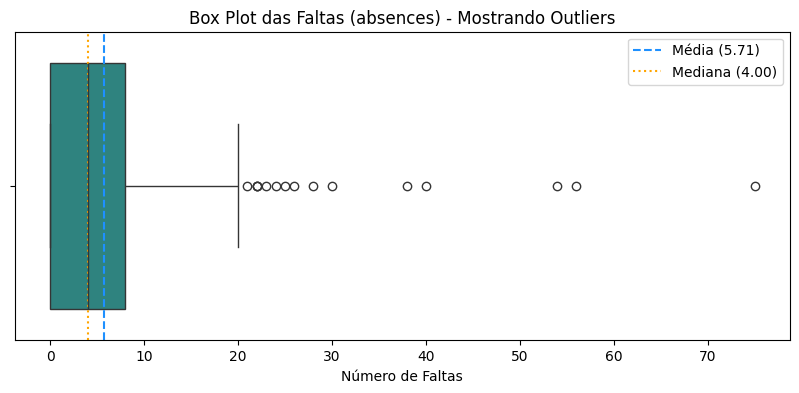


--- Potenciais Outliers Identificados (Total: 15) ---
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
276     GP   F   18       R     GT3       A     3     2     other  services   
183     GP   F   17       U     LE3       T     3     3     other     other   
74      GP   F   16       U     GT3       T     3     3     other  services   
315     GP   F   19       R     GT3       T     2     3     other     other   
307     GP   M   19       U     GT3       T     4     4   teacher  services   
280     GP   M   17       U     LE3       A     4     1  services     other   
205     GP   F   17       U     GT3       T     3     4   at_home  services   
103     GP   F   15       U     GT3       T     3     2  services     other   
40      GP   F   16       U     LE3       T     2     2     other     other   
198     GP   F   17       U     GT3       T     4     4  services   teacher   
320     GP   F   17       U     GT3       A     4     3  services  services 

In [11]:
plt.figure(figsize=(10, 4)) 

# Criar o Box Plot para 'absences'
# Usar x= para um box plot horizontal, que pode ser melhor para visualizar
# outliers numa escala ampla como a de faltas.
sns.boxplot(x=data['absences'], palette='viridis')

plt.title('Box Plot das Faltas (absences) - Mostrando Outliers')
plt.xlabel('Número de Faltas')
#plt.ylabel('') # Não necessário para boxplot horizontal de uma variável

# Adicionar linhas de Média e Mediana para referência (opcional no boxplot)
mean_absences = data['absences'].mean()
median_absences = data['absences'].median()
plt.axvline(mean_absences, color='dodgerblue', linestyle='--', label=f'Média ({mean_absences:.2f})')
plt.axvline(median_absences, color='orange', linestyle=':', label=f'Mediana ({median_absences:.2f})')
plt.legend()


plt.show()

# Opcional: Imprimir os valores considerados outliers pelo critério do boxplot (aproximado)
q1 = data['absences'].quantile(0.25)
q3 = data['absences'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr



outliers = data[(data['absences'] < lower_bound) | (data['absences'] > upper_bound)]
print(f"\n--- Potenciais Outliers Identificados (Total: {len(outliers)}) ---")
# Mostrar alguns exemplos de outliers (ordenados)
print(outliers.sort_values('absences', ascending=False).head(15)) # Mostra os 15 maiores

9. Line plot para comparar faltas 'absences' e tempo livre 'freetime'. 


Com base no gráfico apresentado, é possível tirar duas conclusões iniciais sobre a relação entre o tempo livre dos alunos (freetime) e o número de faltas (absences):
1ªconclusão:
Menos tempo livre pode estar associado a mais faltas: Alunos com nível mais baixo de tempo livre (nível 1) apresentam, em média, um número significativamente maior de faltas do que os demais. Isso pode indicar que uma carga elevada de compromissos fora da escola (como trabalho ou responsabilidades familiares interfere na frequência escolar
2ªconclusão:
A relação não é linear e estabiliza com mais tempo livre: A partir do nível 3 de tempo livre, o número médio de faltas tende a se estabilizar, com uma leve elevação nos níveis 4 e 5. Isso pode sugerir que, embora mais tempo livre reduza inicialmente as faltas, um excesso também pode estar relacionado a menor comprometimento escolar em alguns casos.


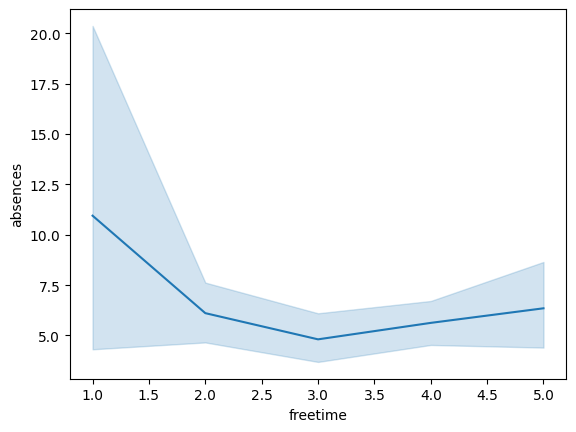

In [12]:
sns.lineplot(x='freetime', y='absences', data=data, estimator=np.mean)
print('Com base no gráfico apresentado, é possível tirar duas conclusões iniciais sobre a relação entre o tempo livre dos alunos (freetime) e o número de faltas (absences):')

print("1ªconclusão:\nMenos tempo livre pode estar associado a mais faltas: Alunos com nível mais baixo de tempo livre (nível 1) apresentam, em média, um número significativamente maior de faltas do que os demais. Isso pode indicar que uma carga elevada de compromissos fora da escola (como trabalho ou responsabilidades familiares interfere na frequência escolar")
      
print('2ªconclusão:\nA relação não é linear e estabiliza com mais tempo livre: A partir do nível 3 de tempo livre, o número médio de faltas tende a se estabilizar, com uma leve elevação nos níveis 4 e 5. Isso pode sugerir que, embora mais tempo livre reduza inicialmente as faltas, um excesso também pode estar relacionado a menor comprometimento escolar em alguns casos.')


10. Grafico de relação entre faltas e admissões

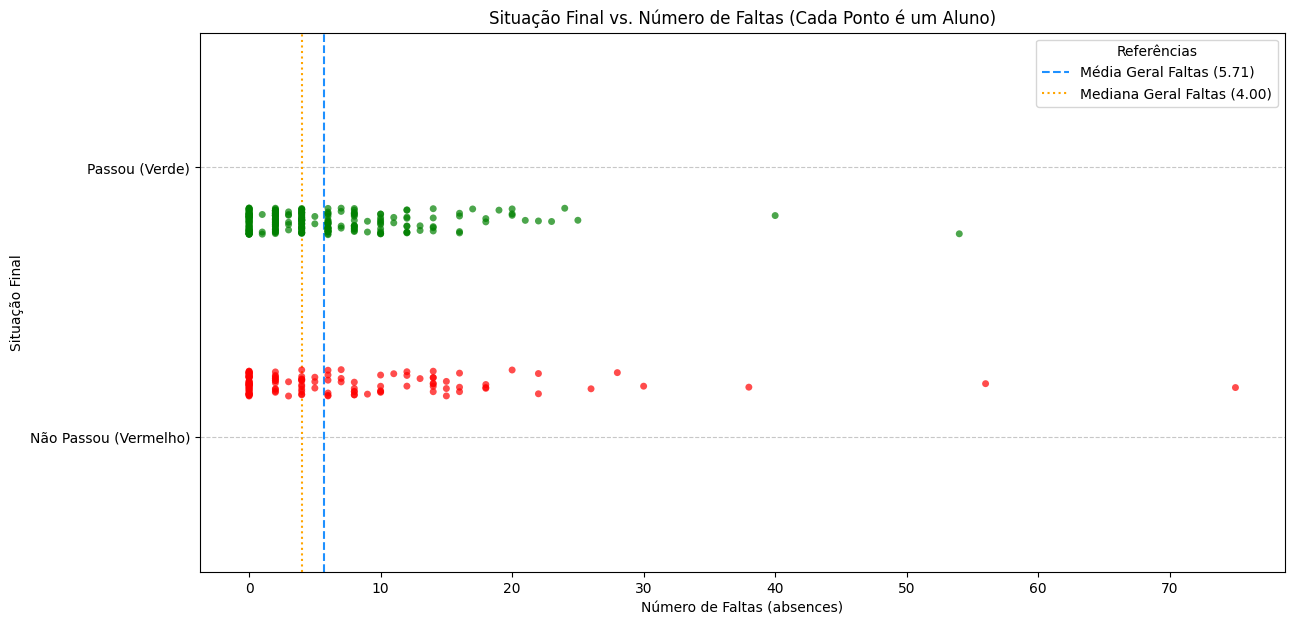


--- Média e Mediana de Faltas por Grupo ---
            mean  median
passed                  
no      6.761538     4.0
yes     5.192453     4.0

Conclusão sobre a Relação entre Situação Final e Número de Faltas:

    Observa-se uma correlação entre o número de faltas e a situação final do aluno.

    1.  **Alunos Aprovados (Verde):** A grande maioria dos alunos que passaram ("Passou")
        apresenta um número baixo de faltas, concentrando-se principalmente abaixo de 10-15 faltas.
        Muitos estão abaixo da mediana geral de faltas (4.00) e da média geral (5.71).
        Embora existam alguns casos de aprovação com um número maior de faltas (um perto de 30,
        outro perto de 40 e um acima de 50), são exceções.

    2.  **Alunos Reprovados (Vermelho):** Os alunos que não passaram ("Não Passou") exibem
        uma maior dispersão no número de faltas. É importante notar que:
        *   Alguns alunos reprovaram mesmo com poucas faltas (inclusive 0 faltas),
            sugerindo

In [13]:



# Define o mapeamento de cores
color_map = {'yes': 'green', 'no': 'red'}

plt.figure(figsize=(14, 7)) # Um pouco mais largo para espalhar os pontos

# Usar stripplot para visualizar pontos individuais
# Jitter=True adiciona uma pequena dispersão horizontal para evitar sobreposição perfeita
sns.stripplot(
    x='absences',
    y='passed',        
    data=data,
    hue='passed',       #detalhes visuais para melhorar a visulaização
    dodge=True,         
    palette=color_map, 
    order=['yes', 'no'],
    jitter=0.1,        
    alpha=0.7,         
    size=5             
)

# Adicionar linhas de Média e Mediana Geral de Faltas como referência
mean_absences = data['absences'].mean()
median_absences = data['absences'].median()
plt.axvline(mean_absences, color='dodgerblue', linestyle='--', label=f'Média Geral Faltas ({mean_absences:.2f})')
plt.axvline(median_absences, color='orange', linestyle=':', label=f'Mediana Geral Faltas ({median_absences:.2f})')

# Ajustes do gráfico
plt.title('Situação Final vs. Número de Faltas (Cada Ponto é um Aluno)')
plt.xlabel('Número de Faltas (absences)')
plt.ylabel('Situação Final')
plt.yticks([0, 1], ['Passou (Verde)', 'Não Passou (Vermelho)']) # Melhora rótulos do eixo Y

# Adicionar grid horizontal para separar melhor as categorias
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar a legenda
# O stripplot pode criar uma legenda por padrão, mas podemos querer apenas as linhas verticais
handles, labels = plt.gca().get_legend_handles_labels()
# Filtra para manter apenas as legendas das linhas verticais (axvline)
line_labels = {label: handle for handle, label in zip(handles, labels) if 'Média' in label or 'Mediana' in label}
plt.legend(line_labels.values(), line_labels.keys(), title="Referências")


plt.show()

# Opcional: Ver média/mediana de faltas por grupo
print("\n--- Média e Mediana de Faltas por Grupo ---")
print(data.groupby('passed')['absences'].agg(['mean', 'median']))
conclusao = """
Conclusão sobre a Relação entre Situação Final e Número de Faltas:

    Observa-se uma correlação entre o número de faltas e a situação final do aluno.

    1.  **Alunos Aprovados (Verde):** A grande maioria dos alunos que passaram ("Passou")
        apresenta um número baixo de faltas, concentrando-se principalmente abaixo de 10-15 faltas.
        Muitos estão abaixo da mediana geral de faltas (4.00) e da média geral (5.71).
        Embora existam alguns casos de aprovação com um número maior de faltas (um perto de 30,
        outro perto de 40 e um acima de 50), são exceções.

    2.  **Alunos Reprovados (Vermelho):** Os alunos que não passaram ("Não Passou") exibem
        uma maior dispersão no número de faltas. É importante notar que:
        *   Alguns alunos reprovaram mesmo com poucas faltas (inclusive 0 faltas),
            sugerindo que outros fatores (como desempenho em avaliações, não mostrados
            neste gráfico) foram determinantes para a reprovação.
        *   No entanto, há uma clara tendência de que um número elevado de faltas está
            fortemente associado à reprovação. No gráfico, todos os alunos com mais de
            aproximadamente 25-30 faltas não passaram. À medida que o número de faltas
...
        e a mediana (4.00) de faltas gerais servem como referências, mas a distinção entre
        aprovados e reprovados se torna mais nítida à medida que o número de faltas aumenta
        significativamente além desses valores
    
    """
print(conclusao)



### Segunda tarefa : Data cleaning and Pre-processing
# Realizado com base na informação já obtida na primeira tarefa(por vezes podemos ter adicionado uma segunda verificação)

0.Definição de Constantes

In [14]:
RAND_STATE = 12
TEST_SIZE = 0.1
INPUT_FILE = 'student-data.csv' # Assuming this is your concatenated file with 'passed' column
TRAIN_PROCESSED_FILE = 'train_processed.csv'
TEST_PROCESSED_FILE = 'test_processed.csv'
OUTPUT_DIR = 'data/processed/' # Define an output directory

1. Preparação da Variável Alvo

In [15]:
if 'passed' in data.columns:
    print("Mapeando a coluna 'passed' para 'passed_mapped' (1 para 'yes', 0 para 'no').")
    data['passed_mapped'] = data['passed'].map({'yes': 1, 'no': 0})
    target_column_name = 'passed_mapped' # Nome da nossa coluna alvo numérica
else:
    print("Erro: A coluna 'passed' não foi encontrada no DataFrame 'data'. Não é possível definir o alvo.")
    exit() # Ou outra forma de tratamento de erro

# Verificar se o mapeamento resultou em NaNs (caso 'passed' tivesse outros valores)
if data[target_column_name].isnull().any():
    print(f"Atenção: Existem valores NaN na coluna '{target_column_name}' após o mapeamento.")
    print(f"Valores únicos em 'passed' original: {data['passed'].unique()}")
    data.dropna(subset=[target_column_name], inplace=True)
    print(f"Linhas com '{target_column_name}' NaN removidas. Novo shape de 'data': {data.shape}")

y = data[target_column_name]
print(f"Variável alvo '{target_column_name}' pronta. Distribuição:\n{y.value_counts(normalize=True)}")


Mapeando a coluna 'passed' para 'passed_mapped' (1 para 'yes', 0 para 'no').
Variável alvo 'passed_mapped' pronta. Distribuição:
passed_mapped
1    0.670886
0    0.329114
Name: proportion, dtype: float64


2. Seleção de Features (X)

In [16]:
cols_to_drop_for_X = ['passed', target_column_name]

# Garantir que estamos a tentar remover apenas colunas que de facto existem
# (embora 'passed' e target_column_name devam existir neste ponto)
actual_cols_to_drop_for_X = [col for col in cols_to_drop_for_X if col in data.columns]
X = data.drop(columns=actual_cols_to_drop_for_X)

print(f"\nFeatures (X) criadas. Shape: {X.shape}")
print("\nPrimeiras linhas de X:")
print(X.head())
print("\nInformações de X (tipos de dados das features):")
X.info() # Descomentar para verificar os tipos de dados em X


Features (X) criadas. Shape: (395, 30)

Primeiras linhas de X:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3    

3. Identificação Automática de Tipos de Colunas para Processamento em X

In [17]:
numeric_cols_to_process = X.select_dtypes(include=np.number).columns.tolist()
nominal_cols_to_process = X.select_dtypes(include='object').columns.tolist()
print(f"\nColunas numéricas identificadas em X para processamento: {numeric_cols_to_process}")
print(f"Colunas nominais identificadas em X para processamento: {nominal_cols_to_process}")

# Verificar se alguma coluna ficou de fora (não é numérica nem 'object')
all_X_cols = X.columns.tolist()
identified_cols = numeric_cols_to_process + nominal_cols_to_process
unidentified_cols = [col for col in all_X_cols if col not in identified_cols]
if unidentified_cols:
    print(f"ATENÇÃO: As seguintes colunas em X não foram classificadas como numéricas nem 'object': {unidentified_cols}")
    print("Estas colunas serão descartadas pelo ColumnTransformer se 'remainder' for 'drop'.")


Colunas numéricas identificadas em X para processamento: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Colunas nominais identificadas em X para processamento: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


4. Divisão dos Dados em Conjuntos de Treino e Teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RAND_STATE, shuffle=True, stratify=y)
print(f"\nDados divididos em treino e teste.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Dados divididos em treino e teste.
X_train shape: (355, 30), y_train shape: (355,)
X_test shape: (40, 30), y_test shape: (40,)


5. Configuração do `ColumnTransformer`

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols_to_process),
        ('cat', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False), nominal_cols_to_process)
    ],
    remainder='drop', # Descarta quaisquer colunas em X que não sejam numéricas ou 'object' (se houver)
    n_jobs=-1
)

6. Aplicação das Transformações

In [20]:
print("\nAplicando transformações de pré-processamento...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Transformações aplicadas.")


Aplicando transformações de pré-processamento...


Transformações aplicadas.


7. Reconstrução dos DataFrames Processados

In [21]:
try:
    nominal_col_names_processed = preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_cols_to_process)
except AttributeError:
    nominal_col_names_processed = preprocessor.named_transformers_['cat'].get_feature_names(nominal_cols_to_process)

# Nomes finais das colunas na ordem correta
final_feature_names = numeric_cols_to_process + list(nominal_col_names_processed)

# Criar DataFrames processados
train_df_processed = pd.DataFrame(X_train_processed, columns=final_feature_names, index=X_train.index)
train_df_processed[target_column_name] = y_train

test_df_processed = pd.DataFrame(X_test_processed, columns=final_feature_names, index=X_test.index)
test_df_processed[target_column_name] = y_test

print(f"\nDataFrames processados reconstruídos.")
print(f"Shape do treino processado: {train_df_processed.shape}")
print(f"Shape do teste processado: {test_df_processed.shape}")
# print("\nPrimeiras 5 linhas dos dados de treino processados:")
# print(train_df_processed.head())



DataFrames processados reconstruídos.
Shape do treino processado: (355, 44)
Shape do teste processado: (40, 44)


8. Armazenamento dos Dados Processados

In [22]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_path = os.path.join(OUTPUT_DIR, TRAIN_PROCESSED_FILE)
test_path = os.path.join(OUTPUT_DIR, TEST_PROCESSED_FILE)

train_df_processed.to_csv(train_path, index=False)
test_df_processed.to_csv(test_path, index=False)

print(f"\nDados processados guardados em:")
print(f"Treino: {train_path}")
print(f"Teste: {test_path}")



Dados processados guardados em:
Treino: data/processed/train_processed.csv
Teste: data/processed/test_processed.csv


### Terceira Tarefa: Data Modeling (Supervised Learning)

0. Definição de Constantes e Carregamento dos Dados Processados


In [3]:
RAND_STATE = 12
TRAIN_PROCESSED_FILE = 'data/processed/train_processed.csv' # Ajusta o nome se necessário
TEST_PROCESSED_FILE = 'data/processed/test_processed.csv'  # Ajusta o nome se necessário
TARGET_COLUMN = 'passed_mapped' # O nome da tua coluna alvo

# %%
# Carregar os dados processados
try:
    train_df = pd.read_csv(TRAIN_PROCESSED_FILE)
    test_df = pd.read_csv(TEST_PROCESSED_FILE)
except FileNotFoundError:
    print(f"Erro: Ficheiros processados não encontrados. Executa o notebook de pré-processamento primeiro.")
    # Para demonstração, vamos criar dataframes vazios ou sair
    exit()

print(f"Shape do treino carregado: {train_df.shape}")
print(f"Shape do teste carregado: {test_df.shape}")
print("\nPrimeiras linhas do treino:")
print(train_df.head())

Shape do treino carregado: (355, 44)
Shape do teste carregado: (40, 44)

Primeiras linhas do treino:
        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0  0.428571  0.50  0.25    0.333333   0.666667       0.0    0.75      0.75   
1  0.000000  0.50  0.50    0.333333   0.333333       0.0    0.75      0.00   
2  0.428571  1.00  1.00    0.666667   0.333333       0.0    0.50      0.25   
3  0.285714  0.25  0.50    0.333333   0.333333       0.0    0.75      0.75   
4  0.428571  1.00  0.75    0.000000   0.333333       0.0    0.75      0.50   

   goout  Dalc  ...  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0   0.75  0.00  ...             1.0            0.0         1.0       1.0   
1   0.50  0.00  ...             0.0            1.0         1.0       1.0   
2   0.25  0.75  ...             0.0            0.0         1.0       1.0   
3   0.75  0.75  ...             1.0            0.0         0.0       1.0   
4   0.25  0.00  ...             0.0            0.0

1. Preparação dos Conjuntos de Treino e Teste (X, y)

In [4]:
if TARGET_COLUMN not in train_df.columns or TARGET_COLUMN not in test_df.columns:
    print(f"Erro: A coluna alvo '{TARGET_COLUMN}' não foi encontrada nos DataFrames carregados.")
    exit()

X_train = train_df.drop(columns=[TARGET_COLUMN])
y_train = train_df[TARGET_COLUMN]

X_test = test_df.drop(columns=[TARGET_COLUMN])
y_test = test_df[TARGET_COLUMN]

print(f"\nShapes após separação X, y:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"\nDistribuição da variável alvo no treino:\n{y_train.value_counts(normalize=True)}")
print(f"Distribuição da variável alvo no teste:\n{y_test.value_counts(normalize=True)}")


Shapes após separação X, y:
X_train: (355, 43), y_train: (355,)
X_test: (40, 43), y_test: (40,)

Distribuição da variável alvo no treino:
passed_mapped
1    0.670423
0    0.329577
Name: proportion, dtype: float64
Distribuição da variável alvo no teste:
passed_mapped
1    0.675
0    0.325
Name: proportion, dtype: float64


2. Definição da Função de Avaliação e Baseline

Classe maioritária no treino: 1

--- Avaliação do Modelo: Baseline (Classe Maioritária) ---
  Acurácia:  0.6750
  Precisão:  0.6750
  Recall:    1.0000
  F1-Score:  0.8060
  AUC ROC:   0.5000

  Matriz de Confusão:


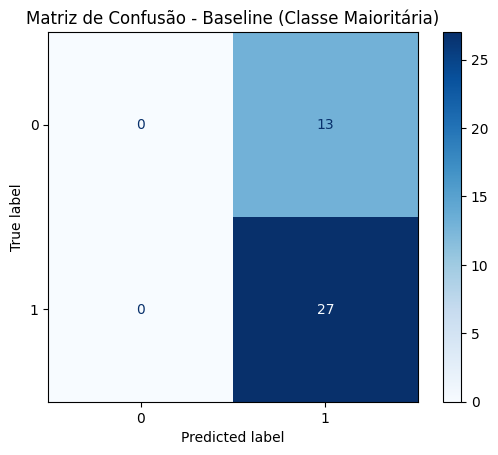


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.68      1.00      0.81        27

    accuracy                           0.68        40
   macro avg       0.34      0.50      0.40        40
weighted avg       0.46      0.68      0.54        40



In [7]:
def evaluate_classification_model(model_name, y_true, y_pred, y_proba=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1]) if y_proba is not None else None

    print(f"\n--- Avaliação do Modelo: {model_name} ---")
    print(f"  Acurácia:  {accuracy:.4f}")
    print(f"  Precisão:  {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"  AUC ROC:   {roc_auc:.4f}")

    print("\n  Matriz de Confusão:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

    print("\n  Relatório de Classificação:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    metrics = {
        'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc
    }
    return metrics, cm
#Baseline: "Prever sempre a classe maioritária (assumindo que '1' - passou - é a maioritária"
majority_class = y_train.mode()[0]
baseline_predictions = np.full_like(y_test, fill_value=majority_class)
baseline_proba = np.zeros((len(y_test), 2)) # Para AUC ROC (probabilidades "falsas")
if majority_class == 1:
    baseline_proba[:,1] = 1.0
else:
    baseline_proba[:,0] = 1.0

print(f"Classe maioritária no treino: {majority_class}")
baseline_metrics, _ = evaluate_classification_model("Baseline (Classe Maioritária)", y_test, baseline_predictions, baseline_proba)


3. Experimentação Inicial com Diferentes Algoritmos (Validação Cruzada no Treino)
    Nesta fase, vamos usar `cross_val_score` no conjunto de treino (`X_train`, `y_train`) para obter uma estimativa mais robusta da performance de cada algoritmo com os seus parâmetros padrão. Usaremos `StratifiedKFold` devido ao ligeiro desequilíbrio de classes.


In [12]:
models = {
    "Regressão Logística": LogisticRegression(random_state=RAND_STATE, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=RAND_STATE),
    "Random Forest": RandomForestClassifier(random_state=RAND_STATE),
    "SVM": SVC(probability=True, random_state=RAND_STATE), # probability=True para AUC ROC
    "Gradient Boosting": GradientBoostingClassifier(random_state=RAND_STATE),
    "AdaBoost": AdaBoostClassifier(random_state=RAND_STATE)
    # "XGBoost": xgb.XGBClassifier(random_state=RAND_STATE, use_label_encoder=False, eval_metric='logloss') # Descomentar se instalado
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RAND_STATE)
scoring_metric = 'f1' # Podemos focar no F1-score devido ao desequilíbrio

results_cv = {}

for name, model in models.items():
    # Nota: Se o pré-processamento já incluiu escalonamento e one-hot encoding,
    # e X_train é o resultado disso, não precisamos de ColumnTransformer aqui.
    # Se X_train fossem os dados ANTES dessas etapas, usaríamos um Pipeline:
    # pipeline = Pipeline(steps=[('preprocessor', preprocessor_do_teu_notebook_anterior), ('classifier', model)])
    # Mas como X_train já está processado, podemos usar o modelo diretamente.
    # No entanto, para modelos como KNN e SVM que são sensíveis à escala, se X_train não foi escalado
    # (o que parece ter sido, dado o ColumnTransformer no pré-processamento), precisaríamos de um StandardScaler aqui.
    # Assumindo que X_train JÁ ESTÁ escalado:
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring=scoring_metric)
    results_cv[name] = cv_scores
    print(f"{name}: Média {scoring_metric.upper()} (CV) = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Regressão Logística: Média F1 (CV) = 0.7914 (+/- 0.0449)
KNN: Média F1 (CV) = 0.7577 (+/- 0.0467)
Árvore de Decisão: Média F1 (CV) = 0.6761 (+/- 0.0333)
Random Forest: Média F1 (CV) = 0.7917 (+/- 0.0602)
SVM: Média F1 (CV) = 0.8095 (+/- 0.0189)
Gradient Boosting: Média F1 (CV) = 0.7719 (+/- 0.0426)
AdaBoost: Média F1 (CV) = 0.7952 (+/- 0.0373)


4. Seleção dos Modelos Mais Promissores e Treino/Avaliação no Conjunto de Teste
 Com base nos resultados da validação cruzada, vamos selecionar os, por exemplo, 3 melhores modelos para treinar no `X_train` completo e avaliar no `X_test`.


Modelos ordenados por performance na Validação Cruzada (F1-score):
SVM: Média F1 (CV) = 0.8095
AdaBoost: Média F1 (CV) = 0.7952
Random Forest: Média F1 (CV) = 0.7917
Regressão Logística: Média F1 (CV) = 0.7914
Gradient Boosting: Média F1 (CV) = 0.7719
KNN: Média F1 (CV) = 0.7577
Árvore de Decisão: Média F1 (CV) = 0.6761

Selecionando os 3 melhores modelos para avaliação no teste: ['SVM', 'AdaBoost', 'Random Forest']

--- Avaliação do Modelo: SVM ---
  Acurácia:  0.7000
  Precisão:  0.6923
  Recall:    1.0000
  F1-Score:  0.8182
  AUC ROC:   0.5926

  Matriz de Confusão:


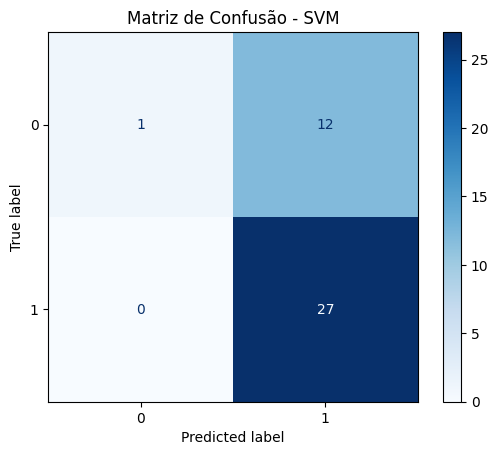


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.69      1.00      0.82        27

    accuracy                           0.70        40
   macro avg       0.85      0.54      0.48        40
weighted avg       0.79      0.70      0.60        40


--- Avaliação do Modelo: AdaBoost ---
  Acurácia:  0.7250
  Precisão:  0.7222
  Recall:    0.9630
  F1-Score:  0.8254
  AUC ROC:   0.6695

  Matriz de Confusão:


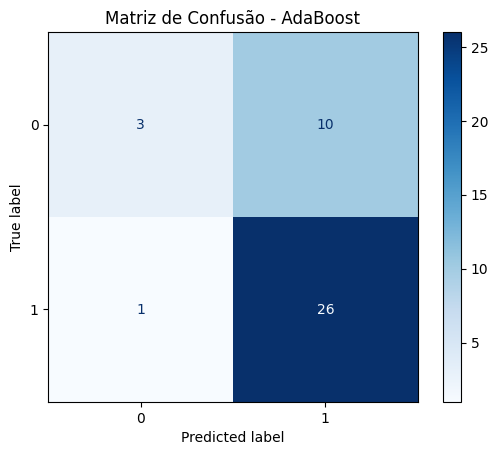


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.72      0.96      0.83        27

    accuracy                           0.72        40
   macro avg       0.74      0.60      0.59        40
weighted avg       0.73      0.72      0.67        40


--- Avaliação do Modelo: Random Forest ---
  Acurácia:  0.7000
  Precisão:  0.7027
  Recall:    0.9630
  F1-Score:  0.8125
  AUC ROC:   0.5442

  Matriz de Confusão:


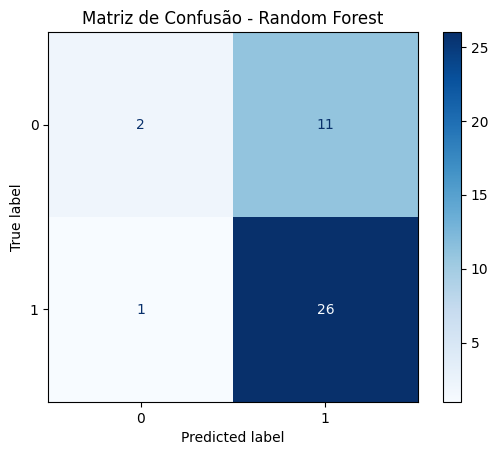


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.70      0.96      0.81        27

    accuracy                           0.70        40
   macro avg       0.68      0.56      0.53        40
weighted avg       0.69      0.70      0.63        40



In [13]:
sorted_models_cv = sorted(results_cv.items(), key=lambda item: item[1].mean(), reverse=True)
print("\nModelos ordenados por performance na Validação Cruzada (F1-score):")
for name, scores in sorted_models_cv:
    print(f"{name}: Média F1 (CV) = {scores.mean():.4f}")

# Selecionar os N melhores (e.g., N=3)
top_n = 3
best_model_names = [name for name, _ in sorted_models_cv[:top_n]]
print(f"\nSelecionando os {top_n} melhores modelos para avaliação no teste: {best_model_names}")

test_set_metrics = {}
trained_models = {}

for name in best_model_names:
    model = models[name] # Pega o modelo com parâmetros padrão
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_proba_test = None
    if hasattr(model, "predict_proba"):
        y_proba_test = model.predict_proba(X_test)
        
    metrics, _ = evaluate_classification_model(name, y_test, y_pred_test, y_proba_test)
    test_set_metrics[name] = metrics
    trained_models[name] = model # Guardar o modelo treinado


5. Otimização de Hiperparâmetros (GridSearchCV) para os Melhores Modelos
    Com os modelos que se destacaram e tentar otimizar os seus hiperparâmetros usando GridSearchCV.


--- Otimização de Hiperparâmetros para Random Forest ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores Parâmetros para Random Forest: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Melhor F1 (CV) com GridSearchCV: 0.8162

--- Avaliação do Modelo: Random Forest (Otimizado) ---
  Acurácia:  0.7000
  Precisão:  0.7143
  Recall:    0.9259
  F1-Score:  0.8065
  AUC ROC:   0.6353

  Matriz de Confusão:


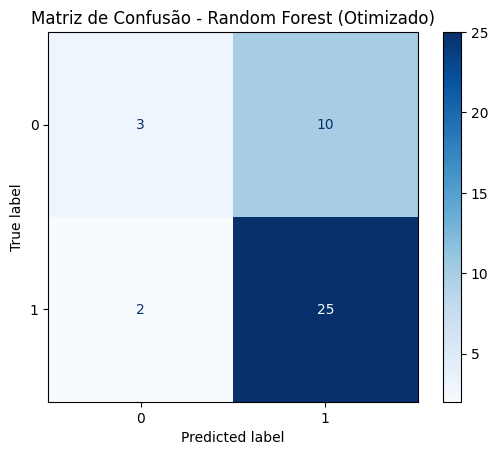


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.23      0.33        13
           1       0.71      0.93      0.81        27

    accuracy                           0.70        40
   macro avg       0.66      0.58      0.57        40
weighted avg       0.68      0.70      0.65        40


--- Otimização de Hiperparâmetros para SVM ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores Parâmetros para SVM: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Melhor F1 (CV) com GridSearchCV: 0.8183

--- Avaliação do Modelo: SVM (Otimizado) ---
  Acurácia:  0.7000
  Precisão:  0.6923
  Recall:    1.0000
  F1-Score:  0.8182
  AUC ROC:   0.6410

  Matriz de Confusão:


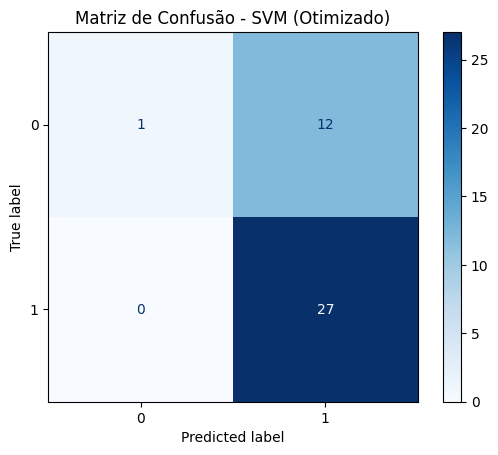


  Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.69      1.00      0.82        27

    accuracy                           0.70        40
   macro avg       0.85      0.54      0.48        40
weighted avg       0.79      0.70      0.60        40



In [14]:
from sklearn.model_selection import GridSearchCV
if "Random Forest" in best_model_names:
    print("\n--- Otimização de Hiperparâmetros para Random Forest ---")
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': [None, 'balanced'] # Bom para desequilíbrio
    }
    rf_model = RandomForestClassifier(random_state=RAND_STATE)
    
    # Se X_train já está totalmente pré-processado, podemos passar diretamente
    # Se precisássemos aplicar o pré-processamento dentro do GridSearch (melhor prática se houver fit no preprocessor)
    # rf_pipeline = Pipeline(steps=[('preprocessor', teu_preprocessor_configurado),
    #                               ('classifier', rf_model)])
    # Mas vamos assumir que X_train e X_test já são os DataFrames processados.
    
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, 
                                  cv=cv_strategy, scoring=scoring_metric, n_jobs=-1, verbose=1)
    grid_search_rf.fit(X_train, y_train)
    
    print(f"Melhores Parâmetros para Random Forest: {grid_search_rf.best_params_}")
    print(f"Melhor {scoring_metric.upper()} (CV) com GridSearchCV: {grid_search_rf.best_score_:.4f}")
    
    # Avaliar o melhor modelo do GridSearchCV no conjunto de teste
    best_rf_model = grid_search_rf.best_estimator_
    y_pred_test_rf_tuned = best_rf_model.predict(X_test)
    y_proba_test_rf_tuned = best_rf_model.predict_proba(X_test)
    
    rf_tuned_metrics, _ = evaluate_classification_model("Random Forest (Otimizado)", 
                                                        y_test, y_pred_test_rf_tuned, 
                                                        y_proba_test_rf_tuned)
    test_set_metrics["Random Forest (Otimizado)"] = rf_tuned_metrics
    trained_models["Random Forest (Otimizado)"] = best_rf_model

# (Adicionar GridSearchCV para outros modelos promissores como SVM, Gradient Boosting, XGBoost)
# Exemplo para SVM
if "SVM" in best_model_names:
    print("\n--- Otimização de Hiperparâmetros para SVM ---")
    svm_params = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'linear'],
        'class_weight': [None, 'balanced']
    }
    svm_model = SVC(probability=True, random_state=RAND_STATE)
    grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=svm_params,
                                   cv=cv_strategy, scoring=scoring_metric, n_jobs=-1, verbose=1)
    grid_search_svm.fit(X_train, y_train)

    print(f"Melhores Parâmetros para SVM: {grid_search_svm.best_params_}")
    print(f"Melhor {scoring_metric.upper()} (CV) com GridSearchCV: {grid_search_svm.best_score_:.4f}")

    best_svm_model = grid_search_svm.best_estimator_
    y_pred_test_svm_tuned = best_svm_model.predict(X_test)
    y_proba_test_svm_tuned = best_svm_model.predict_proba(X_test)

    svm_tuned_metrics, _ = evaluate_classification_model("SVM (Otimizado)",
                                                         y_test, y_pred_test_svm_tuned,
                                                         y_proba_test_svm_tuned)
    test_set_metrics["SVM (Otimizado)"] = svm_tuned_metrics
    trained_models["SVM (Otimizado)"] = best_svm_model


6. Comparação Final dos Modelos e Interpretação


--- Comparação Final das Métricas no Conjunto de Teste ---
                           accuracy  precision    recall        f1   roc_auc
AdaBoost                      0.725   0.722222  0.962963  0.825397  0.669516
SVM                           0.700   0.692308  1.000000  0.818182  0.592593
SVM (Otimizado)               0.700   0.692308  1.000000  0.818182  0.641026
Random Forest                 0.700   0.702703  0.962963  0.812500  0.544160
Random Forest (Otimizado)     0.700   0.714286  0.925926  0.806452  0.635328


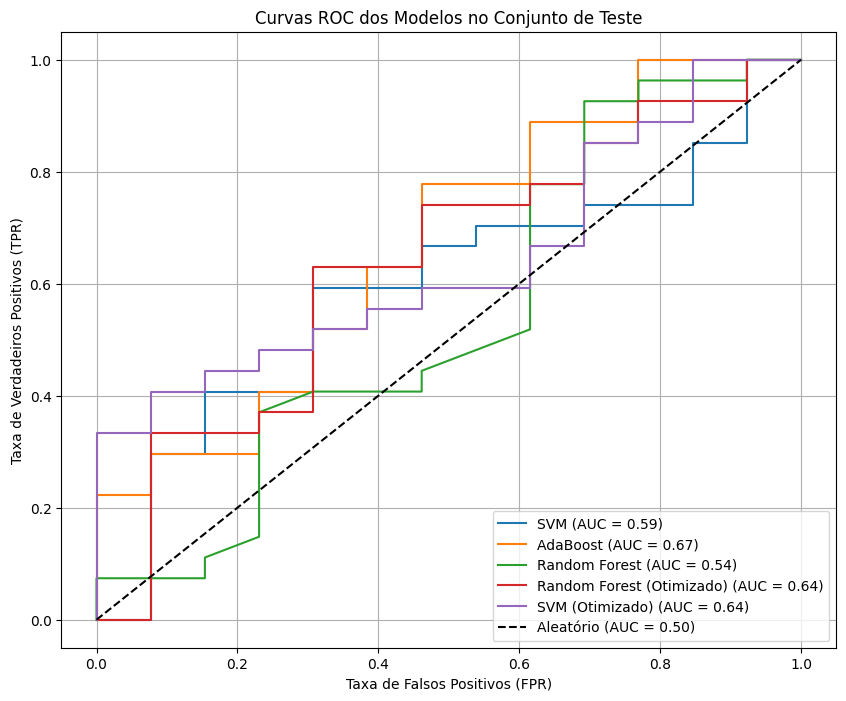

In [20]:
from  sklearn.metrics import roc_curve, auc


print("\n--- Comparação Final das Métricas no Conjunto de Teste ---")
#metrics_df = pd.DataFrame(test_set_metrics).T.sort_values(by=scoring_metric.upper(), ascending=False)
metrics_df = pd.DataFrame(test_set_metrics).T.sort_values(by=scoring_metric, ascending=False)
print(metrics_df)

# Plotar curvas ROC para os melhores modelos
plt.figure(figsize=(10, 8))
for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_proba_test = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC dos Modelos no Conjunto de Teste')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Interpretação dos Resultados:
 
 *   **Melhor Modelo:** Com base na métrica de F1-score (ou AUC ROC), qual foi o melhor modelo final?
*   **Performance Geral:** O modelo atinge um nível de performance aceitável para um "Student Intervention System"?
*   **Análise da Matriz de Confusão do Melhor Modelo:**
  *   Quantos alunos que iriam reprovar (`passed_mapped=0`) foram corretamente identificados (Verdadeiros Negativos)?
    * Quantos alunos que iriam reprovar foram incorretamente classificados como aprovados (Falsos Positivos - Tipo I ou II dependendo da definição da classe positiva)? Este é um erro crítico, pois significa não intervir quando necessário.
    *   Quantos alunos que iriam passar (`passed_mapped=1`) foram incorretamente classificados como reprovados (Falsos Negativos)? Este erro leva a uma intervenção desnecessária.
   *   Qual tipo de erro é mais problemático neste contexto? Ajustar o threshold de decisão do modelo (se aplicável, e.g., para Regressão Logística) poderia otimizar para reduzir o erro mais crítico, mesmo que afete outras métricas.
 *   **Importância das Features (para modelos baseados em árvore ou com coeficientes):**
    *   Se usaste RandomForestClassifier ou DecisionTreeClassifier, podes aceder a `model.feature_importances_`.
     *   Se usaste LogisticRegression, podes aceder a `model.coef_`.
     *   Quais features foram mais importantes para a decisão do modelo? Isto alinha-se com as tuas descobertas na EDA e com a intuição sobre o problema?
 *   **Limitações e Próximos Passos:**
     *   O desequilíbrio de classes foi um problema? Se sim, técnicas de reamostragem (SMOTE, etc.) poderiam ser exploradas (Extra Element).
     *   Será que features adicionais ou uma melhor engenharia de features poderiam melhorar o modelo?
    *   Explorar "Responsible AI practices" (Extra Element) como fairness e explicabilidade (e.g., com SHAP ou LIME).


 ### Guardar o Melhor Modelo (Opcional)

In [21]:
import joblib
best_final_model_name = metrics_df.index[0] # Assume que a primeira linha é o melhor
best_final_model = trained_models[best_final_model_name]

output_model_path = "best_student_intervention_model.joblib"
joblib.dump(best_final_model, output_model_path)
print(f"\nMelhor modelo ({best_final_model_name}) guardado em: {output_model_path}")




Melhor modelo (AdaBoost) guardado em: best_student_intervention_model.joblib
